<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None) 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [56]:
df= pd.read_csv('Likes.csv')

print("Shape of the Data:", df.shape)
df.head()

# Data has 2104 rows and 15 columns/features.

Shape of the Data: (2104, 15)


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [57]:
# Eliminating unecessary columns.
# Eliminating all the DOB columns because we already have the 'age' column.

df1= df.drop(['userid', 'dob_day', 'dob_year', 'dob_month'], axis= 1)

# Separating Numerical and Categorical Features
df1_num= df1.select_dtypes(np.number).drop('likes', axis= 1)
df1_cat= df1.select_dtypes(object)

num_cols= df1_num.columns
cat_cols= df1_cat.columns

In [58]:
df1.dropna(axis= 0, inplace= True)

# Dropping 2 records where 'gender' had missing values. 

In [59]:
df1.isnull().sum()

# No missing values now.

age                      0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

## 1. Select more than five columns for EDA

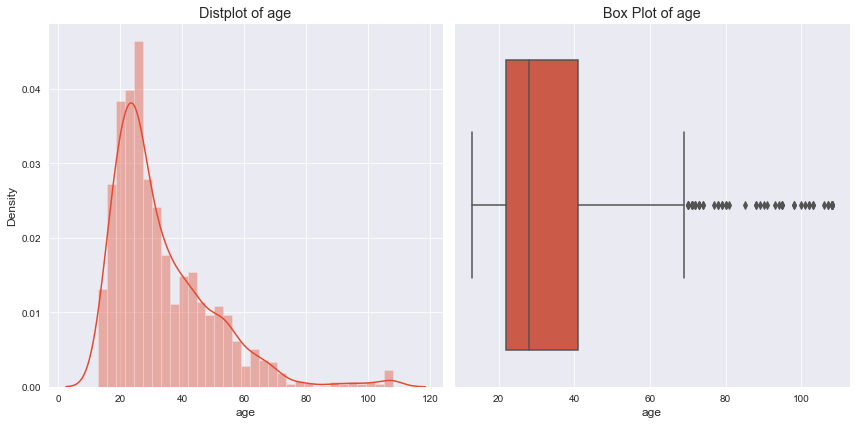

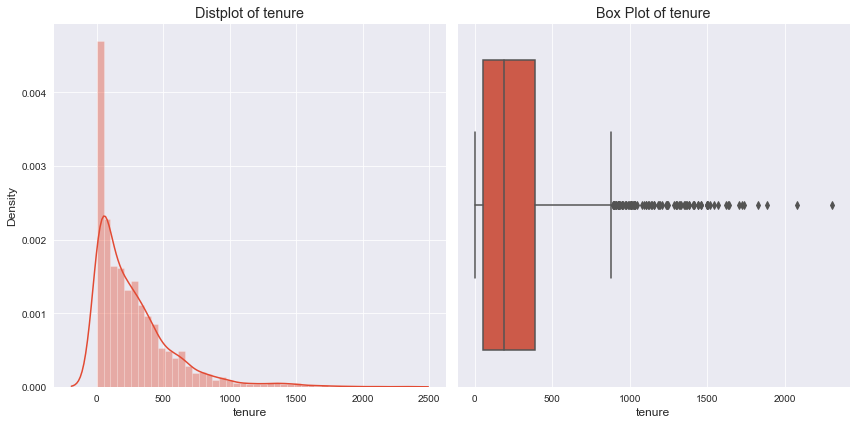

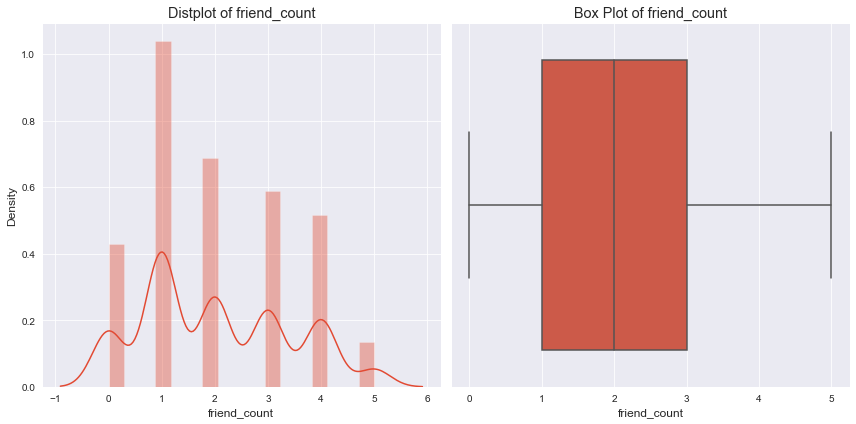

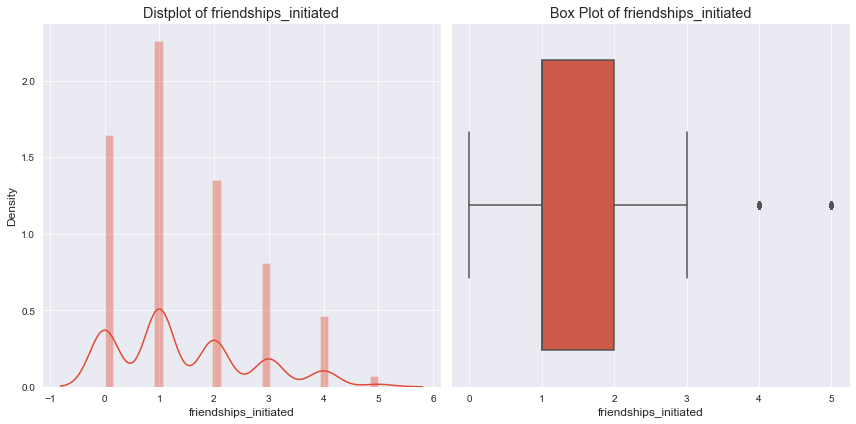

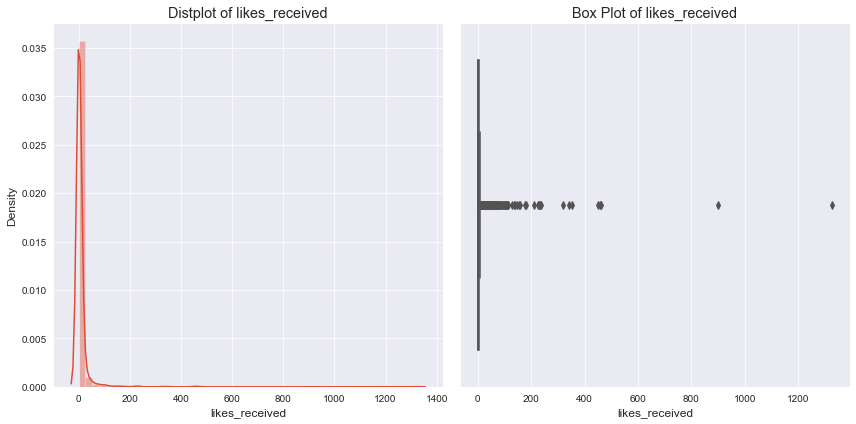

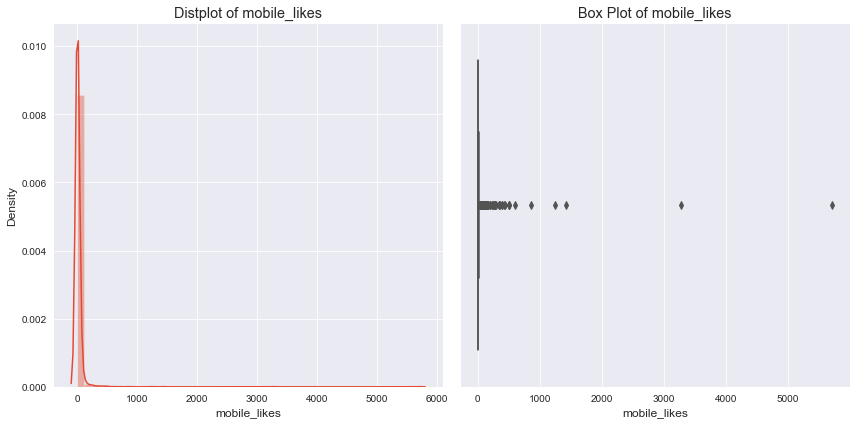

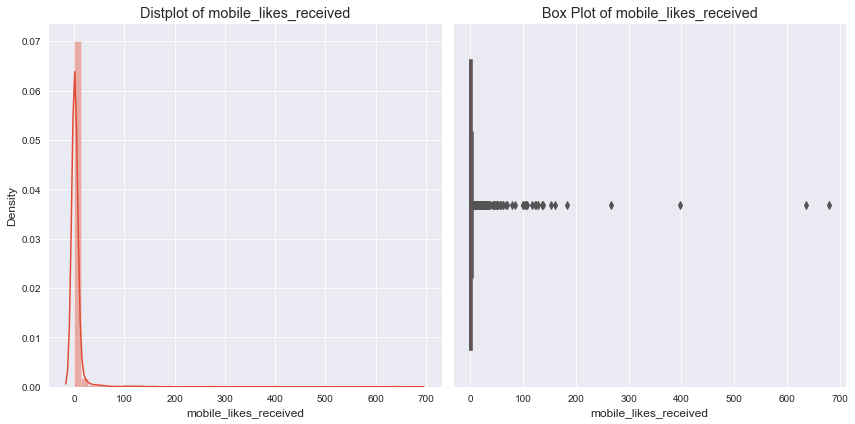

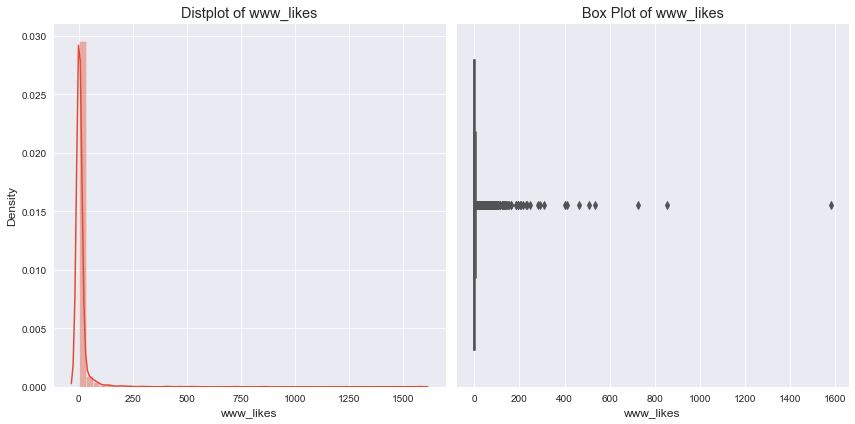

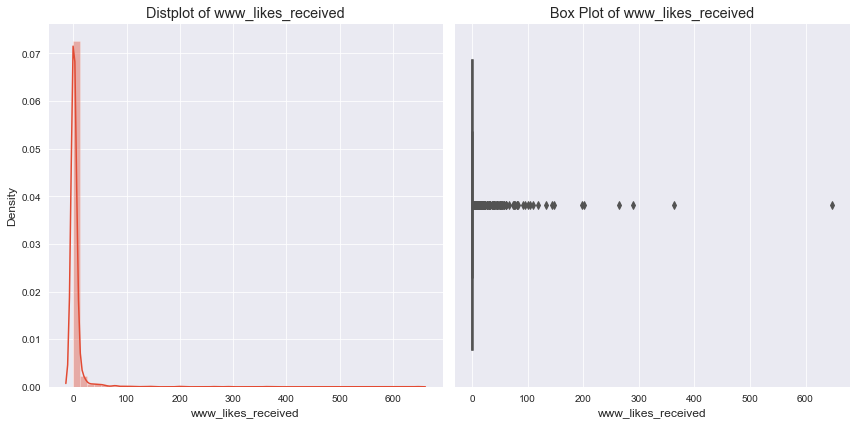

In [60]:
for col in num_cols:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title('Distplot of {}'.format(col))
    sns.distplot(df1[col] )
    plt.subplot(1,2,2)
    plt.title('Box Plot of {}'.format(col))
    sns.boxplot(x=df1[col])
    plt.tight_layout()
    plt.show()

### Inferences:

1. All the numerical features are Right Skewed.
2. All the features have outliers except 'friend_count'.
3. 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes' and 'www_likes_received' features have significant outliers and that is why they are highly skewed.

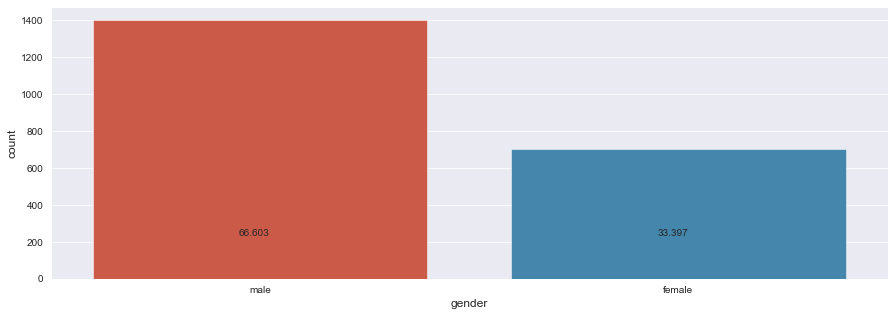

In [61]:
plt.figure(figsize= (15, 5))
sns.countplot(x= 'gender', data= df1)
plt.text(x= -0.05 , y= 230, s= round(df1['gender'].value_counts(normalize= True)[0]*100, 3))
plt.text(x= 0.95 , y= 230, s= round(df1['gender'].value_counts(normalize= True)[1]*100, 3))
plt.show()

### Inferences:

The number of 'male' records are double the number of 'female' records.

### 2. Plot the heat map

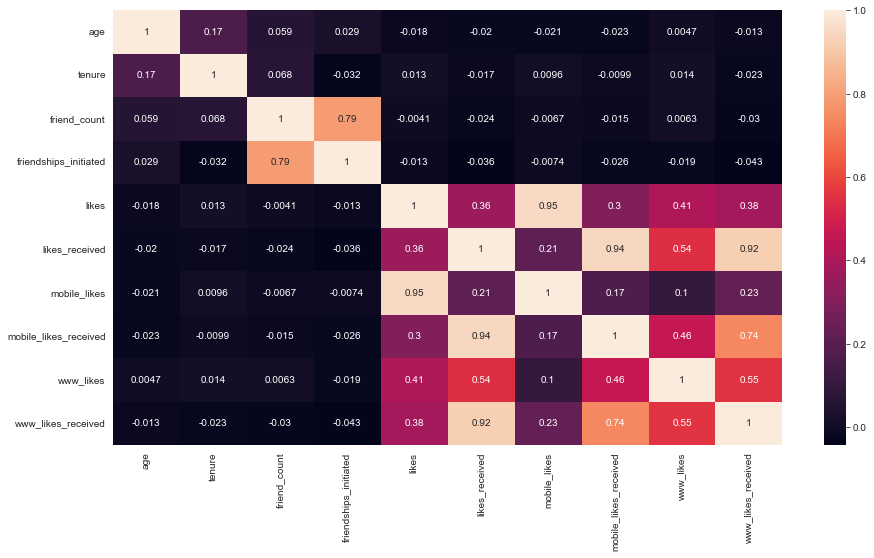

In [62]:
# Heatmap Including the Dependent Variable

plt.figure(figsize= (15,8))
sns.heatmap(df1.corr(), annot= True)
plt.show()

### Inferences:

1. friend_count and friendship_initiated have moderately high correlation.
2. mobile_likes_received and www_likes_received also have moderately high correlation.
3. likes and mobile_likes have the highest correlation.
4. likes_received and mobile_likes_received have high correlation.
5. likes_received and www_likes_received also have high correlation.

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

### 1. Split the dataset in dependent variable is [likes] and independent

In [63]:
# Splitting the dataset into Dependent and Independent Variables.

X= df1.drop('likes', axis= 1)
y= df1['likes']

X_num= X.select_dtypes(np.number)
X_cat= X.select_dtypes(object)

In [64]:
# Dummy encoding the only Categorical feature i.e. 'gender'.

X_cat= pd.get_dummies(data= X_cat, columns= ['gender'], drop_first= True)

In [65]:
# Scaling all the Numerical features.

ss= StandardScaler()
X_num= pd.DataFrame(ss.fit_transform(X_num), columns= X_num.columns, index= X_num.index)

In [66]:
# Making the data ready to fit it in the model.

X= pd.concat([X_num, X_cat], axis= 1).dropna(axis= 0)

In [67]:
# Splitting the Data into Train and Test Set.

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 5)
# test_size= 0.3 means, 30% records will go towards the test data.

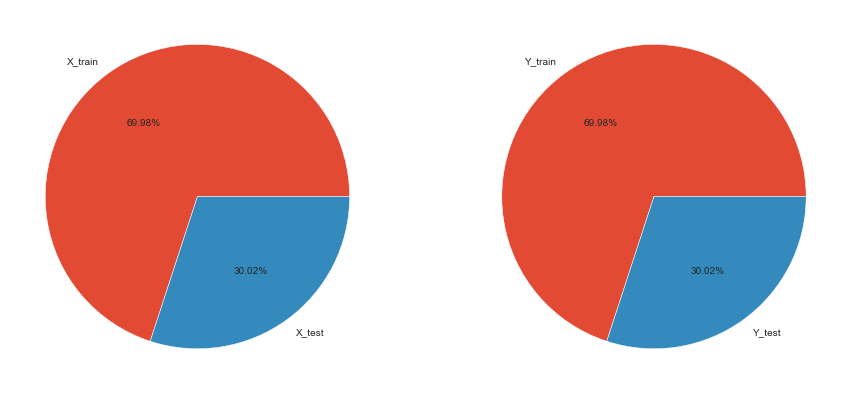

In [68]:
# Proving that the data is split in 70:30 ratio statistically.

plt.figure(figsize= (15,8))

plt.subplot(1,2,1)
plt.pie(x= [len(x_train), len(x_test)], labels= ['X_train', 'X_test'], autopct='%.2f%%')

plt.subplot(1,2,2)
plt.pie(x= [len(y_train), len(y_test)], labels= ['Y_train', 'Y_test'], autopct='%.2f%%')

plt.show()

<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [69]:
# Using Linear Regression

linreg= LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [70]:
print("R-Square Score on Train Set:", linreg.score(x_train, y_train))

R-Square Score on Train Set: 1.0


In [71]:
print("R-Square Score on Test Set:", linreg.score(x_test, y_test))

R-Square Score on Test Set: 1.0


In [72]:
y_pred_train= linreg.predict(x_train)
print('RMSE of Train Test:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
y_pred= linreg.predict(x_test)
print('RMSE of Test Test:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Train Test: 1.357174862832332e-13
RMSE of Test Test: 2.2179027414766575e-13


In [73]:
x_train_const= sm.add_constant(x_train)
x_test_const= sm.add_constant(x_test)

In [74]:
model= sm.OLS(y_train.values, x_train_const)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.826e+32
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:33:50   Log-Likelihood:                 41191.
No. Observations:                1471   AIC:                        -8.236e+04
Df Residuals:                    1461   BIC:                        -8.231e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.6694   7.61e-15   3.64e+15      0.000      27.669      27.669
age                   -4.929e-14   4.31e-15    -11.426      0.000   -5.78e-14   -4.08e-14
tenure                 7.305e-14   4.57e-15     16.002      0.000    6.41e-14     8.2e-14
friend_count          -5.973e-14   7.34e-15     -8.138      0.000   -7.41e-14   -4.53e-14
friendships_initiated -4.607e-14   7.38e-15     -6.240      0.000   -6.06e-14   -3.16e-14
likes_received        -6.262e-14   2.69e-15    -23.297      0.000   -6.79e-14   -5.73e-14
mobile_likes            155.2860   4.48e-15   3.47e+16      0.000     155.286     155.286
mobile_likes_received -1.421e-14   6.54e-15     -2.173      0.030    -2.7e-14   -1.38e-15
www_likes                53.7584   5.34e-15   1.01e+16      0.000      53.758      53.758
www_likes_received    -2.309e-14   6.65e-15     -3.475      0.001   -3.61e-14   -1.01e-14
gender_male           -8.882e-14   9.33e-15     -9.522      0.000   -1.07e-13   -7.05e-14
==============================================================================
Omnibus:                      386.974   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1974.847
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       8.202   Cond. No.                     1.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
y_pred_train= result.predict(x_train_const)
print('RMSE of Train Test:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
y_pred= result.predict(x_test_const)
print('RMSE of Test Test:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Train Test: 1.6693098331121836e-13
RMSE of Test Test: 2.5577722915988606e-13


### Inference:

1. R-squared value is 1 (using both OLS and LinearRegression). That means there is severe overfitting.
2. RMSE value is very low for both Train and Test set.

In [76]:
train_score=[]
test_score=[]
rmse_trains=[]
rmse_tests=[]
features=[]
counts=[]
for i in range(1, len(X.columns)+1):
    lr= LinearRegression()
    rfe= RFE(estimator= lr, n_features_to_select= i)
    fe= rfe.fit(x_train, y_train)
    feature= x_train.columns[fe.support_]
    model= lr.fit(x_train[feature], y_train)
    
    
    r2_train= model.score(x_train[feature], y_train)
    r2_test= model.score(x_test[feature], y_test)
    
    y_train_predicted= model.predict(x_train[feature])
    y_test_predicted= model.predict(x_test[feature])
    
    rmse_train= np.sqrt(mean_squared_error(y_train , y_train_predicted)) 
    rmse_test= np.sqrt(mean_squared_error(y_test , y_test_predicted))
    
    count= len(feature)
    features.append(list(feature.values))
    train_score.append(r2_train)
    test_score.append(r2_test)
    rmse_trains.append(rmse_train)
    rmse_tests.append(rmse_test)
    counts.append(count)

In [77]:
feature_summary = pd.DataFrame({'Features': features, 
                                'Train Set Score': train_score,
                                'Test Set Score': test_score,
                                'RMSE Train Set': rmse_trains,
                                'RMSE Test Set': rmse_tests}, index=counts)

In [78]:
feature_summary

,Features,Train Set Score,Test Set Score,RMSE Train Set,RMSE Test Set
1,[mobile_likes],0.933677,0.792942,4.559516e+01,6.842585e+01
2,"[mobile_likes, www_likes]",1.000000,1.000000,8.314016e-14,5.495170e-14
3,"[friend_count, mobile_likes, www_likes]",1.000000,1.000000,1.071596e-13,8.106046e-14
4,"[age, friend_count, mobile_likes, www_likes]",1.000000,1.000000,1.321284e-13,1.223382e-13
5,"[age, friend_count, mobile_likes, www_likes, www_likes_received]",1.000000,1.000000,9.432764e-14,8.560561e-14
6,"[age, friend_count, mobile_likes, mobile_likes_received, www_likes, www_likes_received]",1.000000,1.000000,1.363407e-13,2.284863e-13
7,"[age, friend_count, friendships_initiated, mobile_likes, mobile_likes_received, www_likes, www_likes_received]",1.000000,1.000000,6.803716e-14,6.801949e-14
8,"[age, friend_count, friendships_initiated, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received]",1.000000,1.000000,4.151408e-14,5.125007e-14
9,"[age, tenure, friend_count, friendships_initiated, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received]",1.000000,1.000000,1.434696e-13,1.577760e-13
10,"[age, tenure, friend_count, friendships_initiated, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received, gender_male]",1.000000,1.000000,1.357175e-13,2.217903e-13


**Inference:** 
If we have to choose n number of features from 4-30, we will choose 4 features as they are enough to get the model to give the best performance.

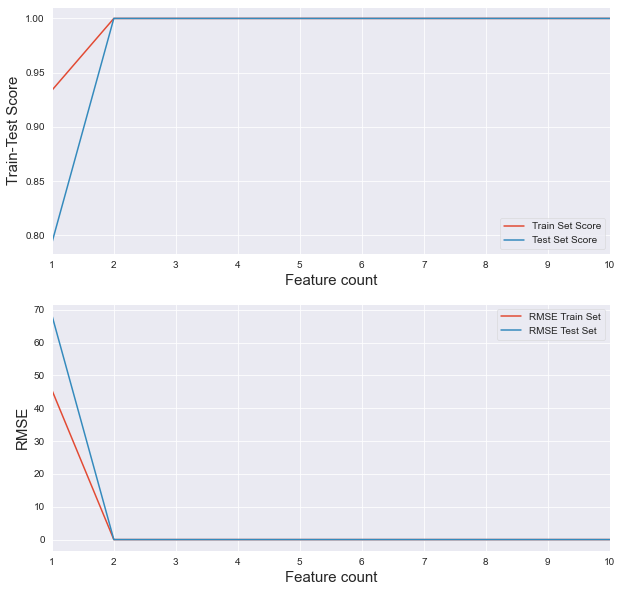

In [79]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.lineplot(x= feature_summary.index, y= 'Train Set Score', data= feature_summary)
sns.lineplot(x= feature_summary.index, y= 'Test Set Score', data= feature_summary)
plt.xlim(1,10)
plt.legend(labels= ['Train Set Score','Test Set Score'])
plt.xlabel('Feature count', size=15)
plt.ylabel('Train-Test Score', size=15)

plt.subplot(2,1,2)
sns.lineplot(x= feature_summary.index, y= 'RMSE Train Set', data= feature_summary)
sns.lineplot(x= feature_summary.index, y= 'RMSE Test Set', data= feature_summary)
plt.xlim(1,10)
plt.legend(labels= ['RMSE Train Set','RMSE Test Set'])
plt.ylabel('RMSE', size=15)
plt.xlabel('Feature count', size=15)

plt.show()

In [80]:
feature= feature_summary.loc[4,'Features']
feature

['age', 'friend_count', 'mobile_likes', 'www_likes']

In [81]:
x_train_new= x_train[feature]
x_train_new= sm.add_constant(x_train_new)

x_test_new= x_test[feature]
x_test_new= sm.add_constant(x_test_new)

In [82]:
model= sm.OLS(y_train, x_train_new)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.469e+31
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:42:19   Log-Likelihood:                 39829.
No. Observations:                1471   AIC:                        -7.965e+04
Df Residuals:                    1466   BIC:                        -7.962e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.6694    1.1e-14   2.51e+15      0.000      27.669      27.669
age          -1.039e-13   1.08e-14     -9.664      0.000   -1.25e-13   -8.28e-14
friend_count -2.769e-13   1.11e-14    -24.960      0.000   -2.99e-13   -2.55e-13
mobile_likes   155.2860   1.05e-14   1.47e+16      0.000     155.286     155.286
www_likes       53.7584    1.3e-14   4.14e+15      0.000      53.758      53.758
==============================================================================
Omnibus:                      288.264   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4171.412
Skew:                          -0.473   Prob(JB):                         0.00
Kurtosis:                      11.195   Cond. No.                         1.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference:

1. R-Squared value for the model with optimal features (selected through RFE) is 1 for both Train and Test set. It means that there is severe Overfitting.
2. RMSE for the Model with optimal features is very low for both Train and Test set.


<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

In [83]:
# Linearity of the Model.

residuals= result.resid

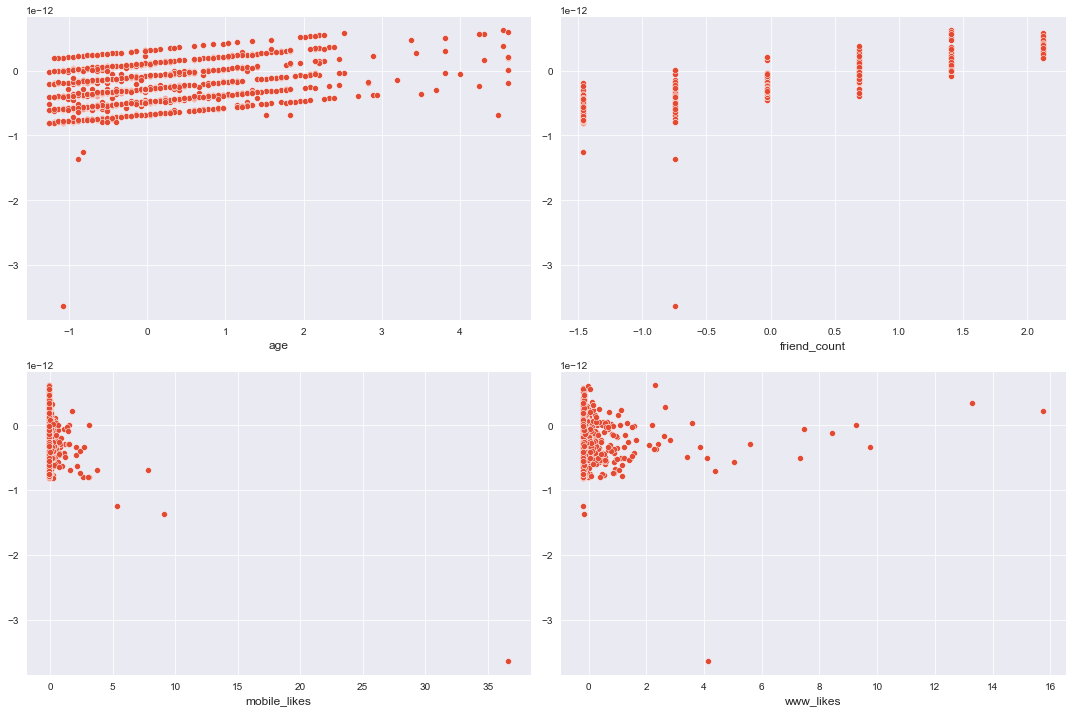

In [84]:
plt.figure(figsize= (15,10))
for i,j in enumerate(feature):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x_train[j], residuals)
plt.tight_layout()
plt.show()

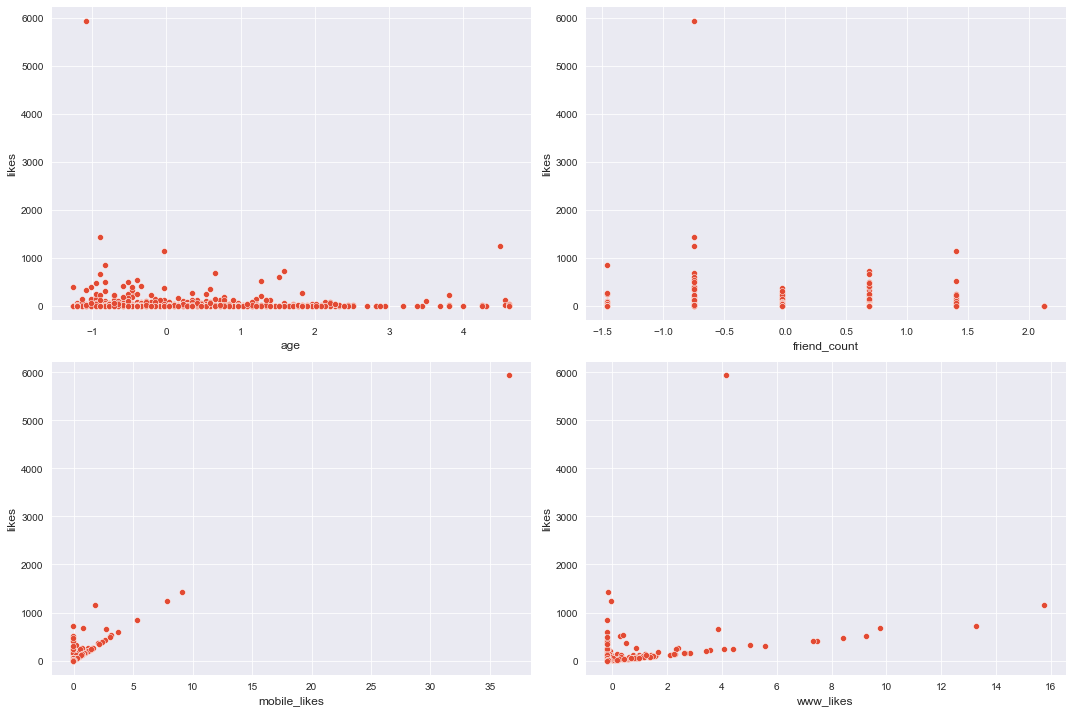

In [85]:
plt.figure(figsize= (15,10))
for i,j in enumerate(feature):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x_train[j], y_train)
plt.tight_layout()
plt.show()

### Inference:

1. If the plot shows no specific pattern then we can conclude the presence of linearity.
2. Residuals and the feature 'www_likes' shows a negative correlation. This means Linearity is not present in the data.
3. y_train and 'mobile_likes' and 'www_likes' show positive correlation. This means Linearity is not present in the data.

In [86]:
# Breusch-Pagan Test for Homoscedasticity

# H0: There is homoscedasticity present in the data

# H1: There is heteroscedasticity present in the data
    
import statsmodels.stats.api as sms
lm, lmpvalue, fvalue, f_pvalue= sms.het_breuschpagan(result.resid, result.model.exog)

print('P_Value:', f_pvalue)

P_Value: 0.0


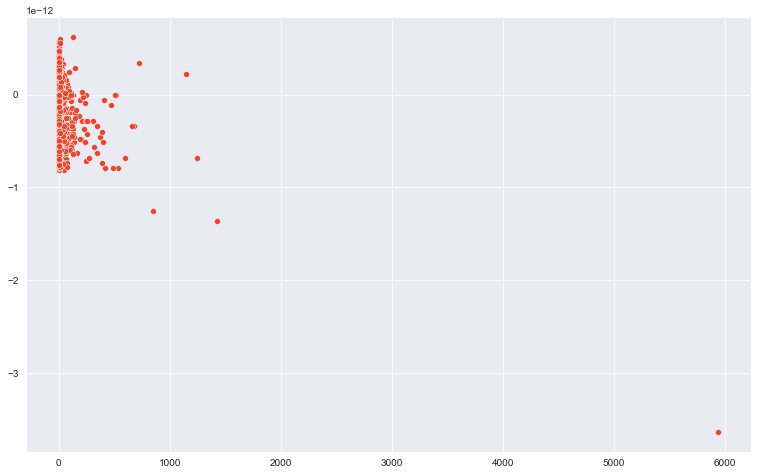

In [87]:
# ScatterPlot for Homoscedasticity

y_pred_train_new= result.predict(x_train_new)
plt.figure(figsize= (13, 8))
sns.scatterplot(x= y_pred_train_new, y= residuals)
plt.show()

### Inference:

1. From Breusch-Pagan Test, we observe that the p-value is less than 0.05, so we reject the Null. Thus, we conclude that there is heteroskedasticity present in the data.
2. From the Scatterplot also it is visible that there is no trend, which means that there is heteroskedasticity present in the data.

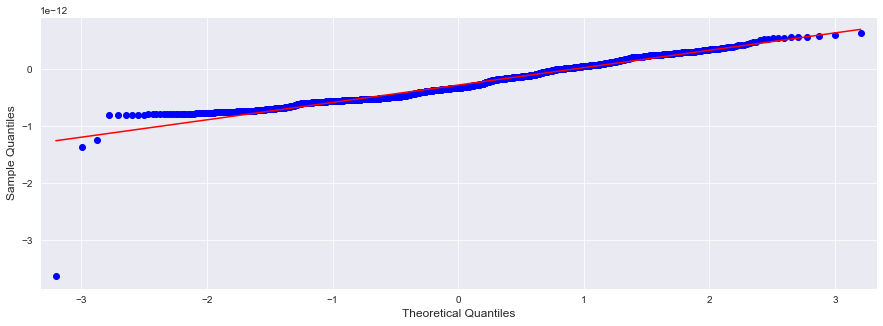

In [88]:
# QQPlot for Normality of residuals

plt.rcParams['figure.figsize'] = [15,5]
qqplot(residuals, line='r')
plt.show()


**Inference:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, we conclude that the residuals do not follow a normal distribution.

In [89]:
# Identifying outliers/influential cases and then removing them.

df1_num= df1.select_dtypes(np.number)
Q1= df1_num.quantile(0.25)
Q3= df1_num.quantile(0.75)
IQR= Q3 - Q1

df2 = df1[~((df1 < (Q1 - (1.5 * IQR))) | (df1 > (Q3 + (1.5 * IQR)))).any(axis=1)]

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

### A. Finding optimal feature count using RFE

In [90]:
X= df2.drop('likes', axis= 1)
y= df2['likes']

X_num= X.select_dtypes(np.number)
X_cat= X.select_dtypes(object)

X_cat= pd.get_dummies(data= X_cat, columns= ['gender'], drop_first= True)

ss= StandardScaler()
X_num= pd.DataFrame(ss.fit_transform(X_num), columns= X_num.columns, index= X_num.index)

X= pd.concat([X_num, X_cat], axis= 1).dropna(axis= 0)

In [91]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 5)

In [92]:
linreg= LinearRegression()
linreg.fit(x_train, y_train)
print("Score on Test Set:", linreg.score(x_test, y_test))

Score on Test Set: 1.0


In [93]:
train_score=[]
test_score=[]
rmse_trains=[]
rmse_tests=[]
features=[]
counts=[]
for i in range(1, len(X.columns)+1):
    lr= LinearRegression()
    rfe= RFE(estimator= lr, n_features_to_select= i)
    fe= rfe.fit(x_train, y_train)
    feature= x_train.columns[fe.support_]
    model= lr.fit(x_train[feature], y_train)
    
    
    r2_train= model.score(x_train[feature], y_train)
    r2_test= model.score(x_test[feature], y_test)
    
    y_train_predicted= model.predict(x_train[feature])
    y_test_predicted= model.predict(x_test[feature])
    
    rmse_train= np.sqrt(mean_squared_error(y_train , y_train_predicted)) 
    rmse_test= np.sqrt(mean_squared_error(y_test , y_test_predicted))
    
    count= len(feature)
    features.append(list(feature.values))
    train_score.append(r2_train)
    test_score.append(r2_test)
    rmse_trains.append(rmse_train)
    rmse_tests.append(rmse_test)
    counts.append(count)

In [94]:
feature_summary = pd.DataFrame({'Features': features, 
                                'Train Set Score': train_score,
                                'Test Set Score': test_score,
                                'RMSE Train Set': rmse_trains,
                                'RMSE Test Set': rmse_tests}, index=counts)

feature_summary

,Features,Train Set Score,Test Set Score,RMSE Train Set,RMSE Test Set
1,[mobile_likes],0.810688,0.771049,1.304426e+00,1.615357e+00
2,"[mobile_likes, www_likes]",1.000000,1.000000,1.186063e-15,1.252632e-15
3,"[friendships_initiated, mobile_likes, www_likes]",1.000000,1.000000,1.247099e-15,1.340657e-15
4,"[tenure, friendships_initiated, mobile_likes, www_likes]",1.000000,1.000000,1.175638e-15,1.136875e-15
5,"[tenure, friend_count, friendships_initiated, mobile_likes, www_likes]",1.000000,1.000000,2.376353e-15,2.645309e-15
6,"[tenure, friend_count, friendships_initiated, mobile_likes, www_likes, gender_male]",1.000000,1.000000,8.976718e-16,1.171923e-15
7,"[tenure, friend_count, friendships_initiated, likes_received, mobile_likes, www_likes, gender_male]",1.000000,1.000000,2.331818e-15,2.434981e-15
8,"[age, tenure, friend_count, friendships_initiated, likes_received, mobile_likes, www_likes, gender_male]",1.000000,1.000000,2.434383e-15,2.518405e-15
9,"[age, tenure, friend_count, friendships_initiated, likes_received, mobile_likes, www_likes, www_likes_received, gender_male]",1.000000,1.000000,1.681217e-15,1.758429e-15
10,"[age, tenure, friend_count, friendships_initiated, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received, gender_male]",1.000000,1.000000,2.718037e-15,3.020018e-15


**Inference:** We can see that just by 2 features, We get the best performance. So, 2 features are enough i.e. 'mobile_likes' and 'www_likes'.

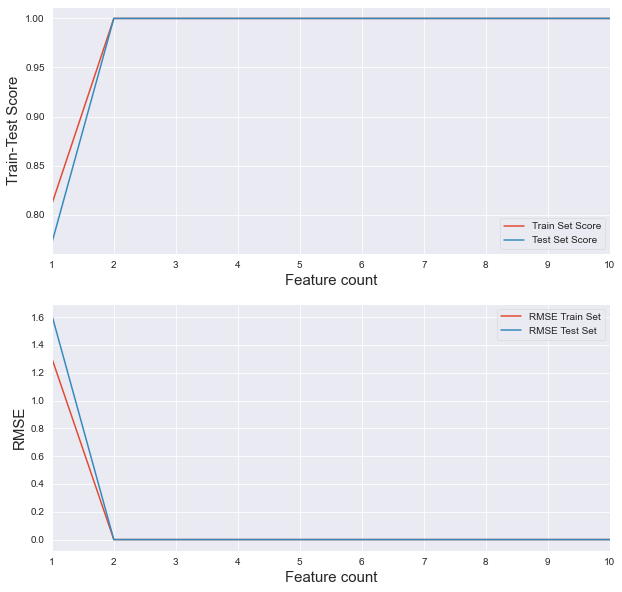

In [95]:
# Plotting R-Squared and RMSE against n_features.

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.lineplot(x= feature_summary.index, y= 'Train Set Score', data= feature_summary)
sns.lineplot(x= feature_summary.index, y= 'Test Set Score', data= feature_summary)
plt.xlim(1,10)
plt.legend(labels= ['Train Set Score','Test Set Score'])
plt.xlabel('Feature count', size=15)
plt.ylabel('Train-Test Score', size=15)

plt.subplot(2,1,2)
sns.lineplot(x= feature_summary.index, y= 'RMSE Train Set', data= feature_summary)
sns.lineplot(x= feature_summary.index, y= 'RMSE Test Set', data= feature_summary)
plt.xlim(1,10)
plt.legend(labels= ['RMSE Train Set','RMSE Test Set'])
plt.ylabel('RMSE', size=15)
plt.xlabel('Feature count', size=15)

plt.show()

In [96]:
# K-Fold Cross Validation

scores = cross_val_score(estimator = LinearRegression(), 
                         X = x_train, 
                         y = y_train, 
                         cv = 100, 
                         scoring = 'r2')

In [97]:
print('All scores:', scores)
print("\nMinimum score obtained:", round(min(scores), 4))
print("Maximum score obtained:", round(max(scores), 4))
print("Average score obtained:", round(np.mean(scores), 4))

All scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]

Minimum score obtained: 1.0
Maximum score obtained: 1.0
Average score obtained: 1.0


### Inference:

1. K-Fold cross validation is where a given dataset is divided into K folds where at some stage each fold is used as a test set.
2. Using K-Fold Cross Validation we find that the score is 1 in every case.